In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import os
import cv2
from glob import glob
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]

# Average graphing

In [24]:
def graph_df(data_frame:pd.DataFrame,begin_index=0,end_index=None):
    if end_index:
        column_name =list(data_frame.columns )[begin_index:end_index]
    else:
        column_name =list(data_frame.columns )[begin_index:]
    fig, ax = plt.subplots()
    print(column_name)
    x = np.arange(0, len(data_frame), step=1)
    

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        ax.plot(x,data_frame[label],color = color_list[i])
        
    colorlist = zip(column_name,color_list)
    handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
    t = ",".join(column_name)
    plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    plt.xlabel('time (ms)')
    plt.ylabel('Ca2+ (nM)')
    #ax.set_title(t)
    plt.tight_layout()

['Average']


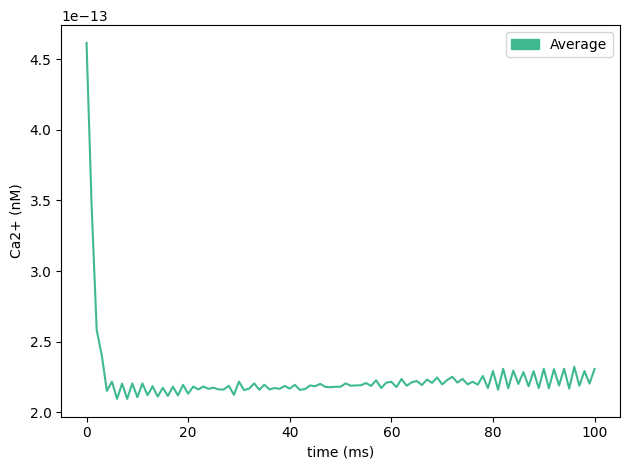

In [25]:
calcium_dynamics = pd.DataFrame(pd.read_csv("../data_files/2d_Piezo_Channel_avg.csv"))
#display(static_ap_df) 
graph_df(calcium_dynamics,0,1)

# Buffer concentration

['buff_average', 'ubuff_average']


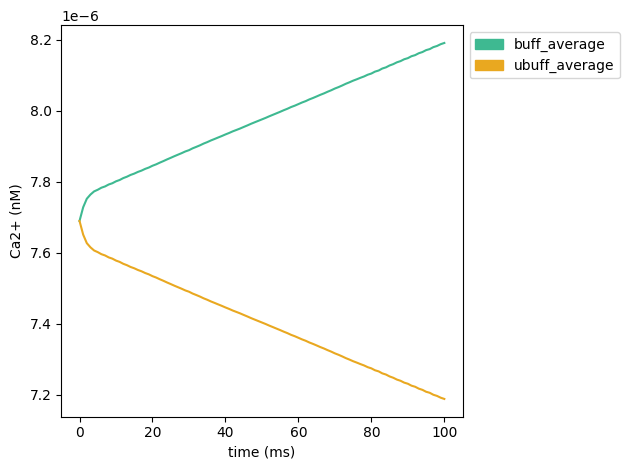

In [26]:
graph_df(calcium_dynamics,1,3)

['Piezo_avg']


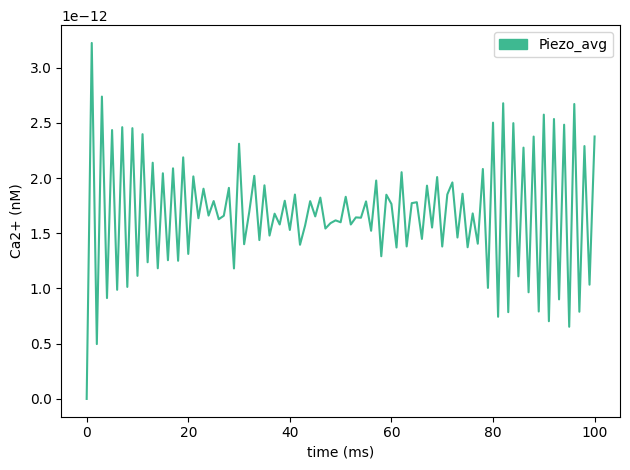

In [27]:
graph_df(calcium_dynamics,3,4)

# Heatmap graphing

In [28]:
def graph_df2(data_frame:pd.DataFrame,begin_index=0,end_index=None):
    if end_index:
        column_name =list(data_frame.columns )[begin_index:end_index]
    else:
        column_name =list(data_frame.columns )[begin_index:]
    fig, ax = plt.subplots()
    # print(column_name)
    x = np.arange(0, len(data_frame), step=1)
    # y = np.arange(0, len(data_frame)/100, step=1/100)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        ax.plot(x,data_frame[label],color = color_list[i])
        
    colorlist = zip(column_name,color_list)
    plt.imshow(data_frame)
    plt.rcParams['figure.figsize'] = [5, 5]
    #ax.set_title(t)
    #plt.tight_layout()

In [29]:
twod_piezo = pd.DataFrame(pd.read_csv("../data_files/2d_Piezo_Channel.csv"))

In [30]:
# #display(static_ap_df)
# graph_df2(twod_piezo,0,2)
# heatmap = plt.imshow(twod_piezo, vmin = 0.9e-11,vmax = 1.125e-11)
# #plt.colorbar(heatmap)
# plt.title('Heatmap')
# plt.show()

# Video gen

In [31]:
def graph_time_frame(data_frame,k,counter):
    row1 = data_frame.iloc[k-1:k+50,:]
    x = np.arange(0,len(row1),step = 1)
    fig, ax = plt.subplots()
    ax.plot(x,row1)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    #heatmap = plt.imshow(row1,vmin = 0.4606e-12,vmax = 2.5e-12)
    heatmap = plt.imshow(row1)
    plt.colorbar(heatmap)
    plt.title('Heatmap')
    ax.set_title(f"time: {counter}")
    if (counter < 10):
        plt.savefig(f"../graphs/2D/000{counter}")
    elif (counter < 100):
        plt.savefig(f"../graphs/2D/00{counter}")
    elif (counter < 1000):
        plt.savefig(f"../graphs/2D/0{counter}")
    else:
        plt.savefig(f"../graphs/2D/{counter}")

    plt.close() 

In [32]:
os.makedirs("../graphs/2D", exist_ok=True)

old_files = glob("../graphs/2D/*.png")
for f in old_files:
    os.remove(f)

In [33]:
k = 0
counter = 0
while k < len(twod_piezo):
    graph_time_frame(twod_piezo,k,counter)
    k += 51
    counter += 1

C:\Users\Jackson\AppData\Local\Temp\ipykernel_18812\2790789444.py:9: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  heatmap = plt.imshow(row1)


# Angela video

In [34]:
# now = datetime.now()
# current_time = now.strftime("%H_%M")
# print(current_time)
# os.system("<path_to_covert> /convert -delay 1 -loop 0 $(ls -1 ../graphs/2D/*.png | sort -V) -quality 95 ../vid/{}_{}.mp4".format("propagation",current_time))

# Jackson video

In [35]:
image_folder = '../graphs/2D'
video_name = 'video.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 10, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()